Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


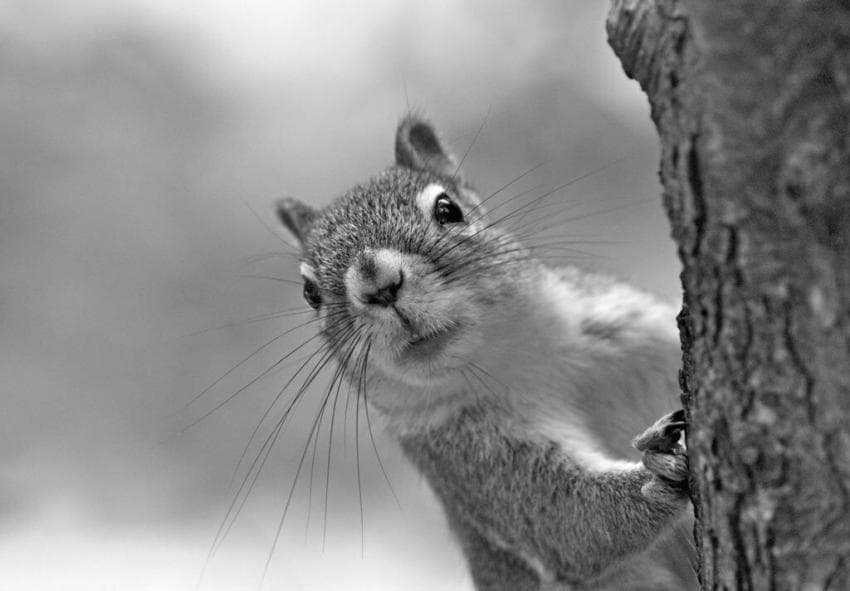

<BarContainer object of 256 artists>

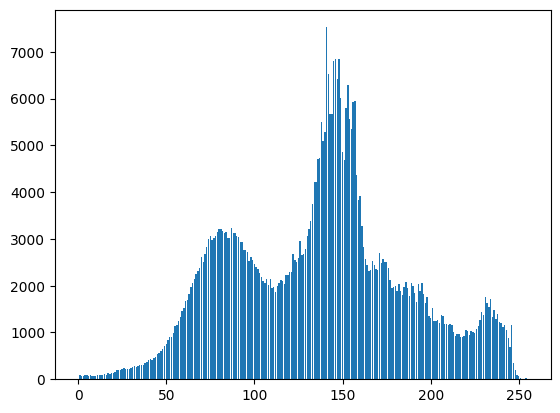

In [ ]:
#출처 https://hoya9802.github.io/computer-vision/histogram_equalization/
#출처 https://velog.io/@csp213/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8histogram-%EC%B2%98%EB%A6%AC
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# load image
input_color_img = cv2.imread("/content/drive/MyDrive/daram.jpg")
height, width, _ = input_color_img.shape
input_gray_img = cv2.cvtColor(input_color_img, cv2.COLOR_BGR2GRAY)

cv2_imshow(input_gray_img)

# gray scale에서 각각의 픽셀은 0~255까지의 값들을 가지게 때문에 다음과 같은 numpy 리스트를 만들어준다.
histogram = np.zeros((256))

# 반복문을 돌면서 각각의 픽셀이 가지는 값마다 개수를 카운팅한 후 histogram list에 저장
for i in range(height):
    for j in range(width):
        histogram[int(input_gray_img[i][j])] += 1

# input 이미지, 히스토그램 출력
import matplotlib.pyplot as plt
plt.bar(range(len(histogram)), histogram)

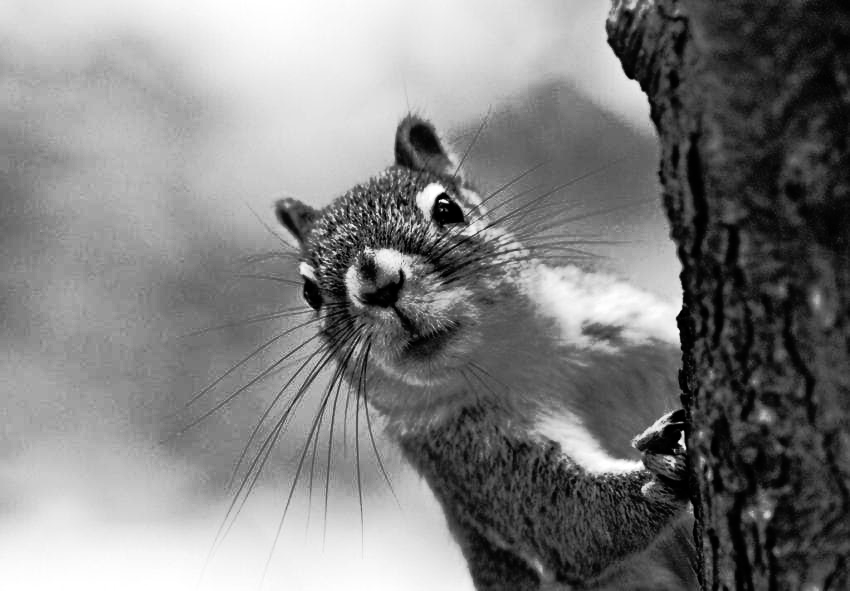

<BarContainer object of 256 artists>

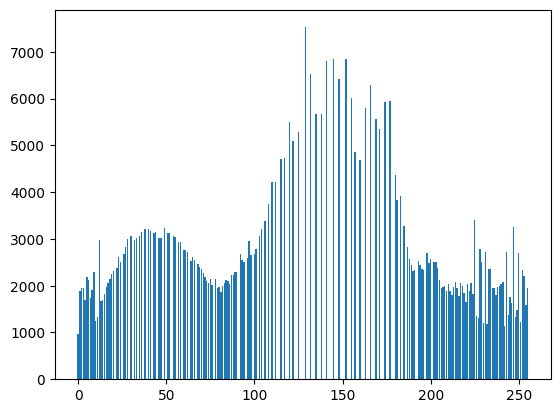

In [ ]:
#히스토그램 평활화
#화소값의 분포를 고르게 만들어줌
dst = cv2.equalizeHist(input_gray_img)
hist = cv2.calcHist([dst],[0],None,[256],[0,256])
cv2_imshow(dst)
plt.bar(range(len(hist.reshape(256))),hist.reshape(256))

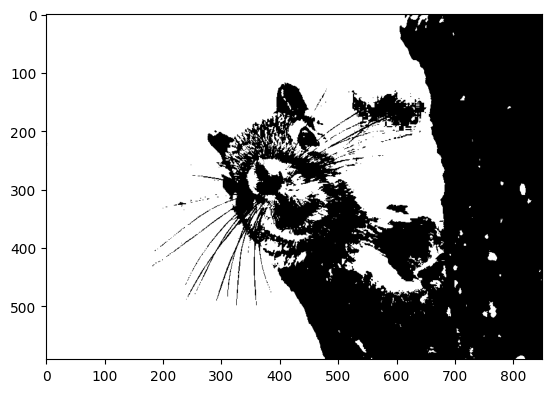

In [ ]:
ret, threshold_img = cv2.threshold(input_gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

128.0


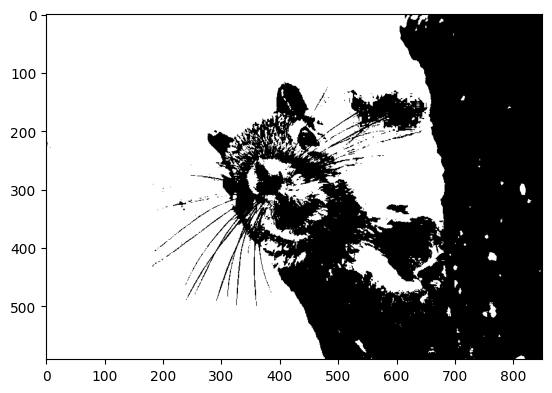

In [ ]:
ret, threshold_img = cv2.threshold(input_gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(threshold_img,cmap='gray')
print(ret)